In [1]:
import os
from data import datasets
from data.graph_wrapper import GeneManiaGraph

import networkx as nx
import matplotlib, matplotlib.pyplot as plt
import numpy as np


/Users/martinweiss/.pyenv/versions/2.7.13/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
dataset = datasets.TCGADataset()
G = GeneManiaGraph()
mapping = dict(zip(range(0, len(dataset.df.columns)), dataset.df.columns))
nx_graph = nx.relabel_nodes(G.nx_graph, mapping)

Checking for pieces on disk: |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0%  finished
185.203.56.6: added new peer
185.149.90.114: added new peer
132.204.251.254: connectToPeer Socket Timeout Error
185.203.56.6: added new peer
185.149.90.114: added new peer
185.149.90.114: added new peer
185.203.56.6: added new peer
185.149.90.114: removing peer because we received a message of 0 length
new number of peers: 5
185.203.56.6: removing peer because we received a message of 0 length
new number of peers: 4
185.149.90.114: removing peer because we received a message of 0 length
new number of peers: 3
185.203.56.6: removing peer because we received a message of 0 length
new number of peers: 2
185.149.90.114: removing peer because we received a message of 0 length
new number of peers: 1
185.203.56.6: removing peer because we received a message of 0 length
new number of peers: 0


KeyboardInterrupt: 

In [5]:
bfs = nx.bfs_edges(nx_graph, "S100A8")

In [7]:
def neighborsOf(graph, nodes, excludes):
    neighbors = set()
    for x in nodes:
        neighbors = neighbors.union(set(graph.neighbors(x)))
    return list(neighbors.difference(set(excludes)))

def removeEdgesBetween(graph, nodes):
    for n1 in nodes:
        for n2 in nodes:
            if graph.has_edge(n1,n2):
                graph.remove_edge(n1,n2)

In [8]:
zero_degree = ["S100A8"]
first_degree = neighborsOf(nx_graph, zero_degree, zero_degree)[:5]
second_degree = neighborsOf(nx_graph, first_degree, first_degree)[:10]
third_degree = neighborsOf(nx_graph, second_degree, second_degree)[:20]

In [9]:
toremove = set(nx_graph.nodes())
toremove = toremove.difference(zero_degree).difference(first_degree).difference(second_degree).difference(third_degree)
nx_graph.remove_nodes_from(toremove)

In [10]:
removeEdgesBetween(nx_graph, first_degree)
removeEdgesBetween(nx_graph, second_degree)
removeEdgesBetween(nx_graph, third_degree)
removeEdgesBetween(nx_graph, first_degree + third_degree)
removeEdgesBetween(nx_graph, zero_degree + second_degree)
removeEdgesBetween(nx_graph, zero_degree + third_degree)

(-86.8442145497281, 86.84421454972812, -86.7601317641433, 86.7601317641433)

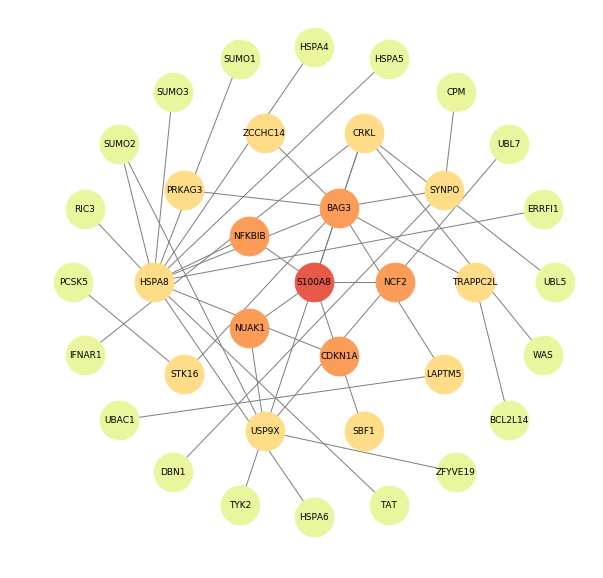

In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
shells = [zero_degree, first_degree, second_degree, third_degree]
cmap = matplotlib.cm.get_cmap('Spectral')
#pos = nx.spring_layout(G, k=0.5)
pos = nx.shell_layout(nx_graph, shells, scale=100)
#pos = nx.circular_layout(G)



#nx.draw_networkx(G, pos, node_color="lightblue",with_labels=True, node_size=1000)

nx.draw_networkx_nodes(nx_graph,pos,nodelist=zero_degree, with_labels=True, node_size=1500,node_color=cmap(40))

nx.draw_networkx_nodes(nx_graph,pos,nodelist=first_degree, node_size=1500,node_color=cmap(70))

nx.draw_networkx_nodes(nx_graph,pos,nodelist=second_degree, node_size=1500,node_color=cmap(100))

nx.draw_networkx_nodes(nx_graph,pos,nodelist=third_degree, node_size=1500,node_color=cmap(150))

nx.draw_networkx_edges(nx_graph,pos, edge_color="gray");

nx.draw_networkx_labels(nx_graph,pos,font_size=9);
plt.axis('off')